In [44]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
train = pd.read_csv('./train.csv')

In [46]:
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [47]:
train.loc[train['Age']<10, 'Age'] = 0
train.loc[(train['Age']>=10)&(train['Age']<20), 'Age'] = 1
train.loc[(train['Age']>=20)&(train['Age']<30), 'Age'] = 2
train.loc[(train['Age']>=30)&(train['Age']<40), 'Age'] = 3
train.loc[(train['Age']>=40)&(train['Age']<50), 'Age'] = 4
train.loc[train['Age']>=50, 'Age'] = 5

In [48]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,2.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,5.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,0.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,2.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1.0,1,0,237736,30.0708,NaN,C


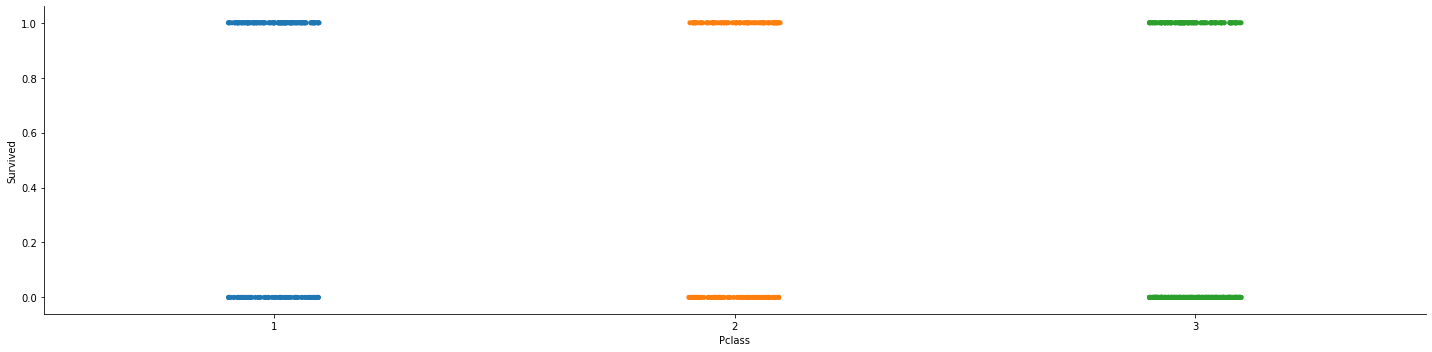

In [49]:
sns.catplot(data = train, x='Pclass', y='Survived', aspect = 4, jitter=True)

In [50]:
train['Fam'] = train['SibSp']+train['Parch']

In [51]:
print(train.count())
print(train.loc[train['Embarked'] == 'C', 'Embarked'].count())
print(train.loc[train['Embarked'] == 'S', 'Embarked'].count())
print(train.loc[train['Embarked'] == 'Q', 'Embarked'].count())
train['Embarked'] = train['Embarked'].fillna('S')

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
Fam            891
dtype: int64
168
644
77


In [52]:
train.loc[train['Embarked']=='C', 'Embarked'] =0
train.loc[train['Embarked']=='S', 'Embarked'] =1
train.loc[train['Embarked']=='Q', 'Embarked'] =2

In [53]:
train.loc[train['Sex']=='male', 'Sex'] =0
train.loc[train['Sex']=='female', 'Sex'] =1

In [54]:
x_train = train[['Pclass', 'Sex', 'Age', 'Fam','Embarked']]
y_train = train[['Survived']]

In [55]:
x_train

,Pclass,Sex,Age,Fam,Embarked
0,3,0,2.0,1,1
1,1,1,3.0,1,0
2,3,1,2.0,0,1
3,1,1,3.0,1,1
4,3,0,3.0,0,1
5,3,0,2.0,0,2
6,1,0,5.0,0,1
7,3,0,0.0,4,1
8,3,1,2.0,2,1
9,2,1,1.0,1,0


In [56]:
from sklearn.tree import DecisionTreeClassifier
x_train.isnull().sum()

Pclass      0
Sex         0
Age         0
Fam         0
Embarked    0
dtype: int64

In [57]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
print(tree.score(x_train, y_train))

0.8641975308641975


In [58]:
test = pd.read_csv('./test.csv')

In [59]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [60]:
test['Age'] = test['Age'].fillna(test['Age'].mean())
test.loc[test['Age']<10, 'Age'] =0
test.loc[(test['Age']>=10)&(test['Age']<20), 'Age'] =1
test.loc[(test['Age']>=20)&(test['Age']<30), 'Age'] =2
test.loc[(test['Age']>=30)&(test['Age']<40), 'Age'] =3
test.loc[(test['Age']>=40)&(test['Age']<50), 'Age'] =4
test.loc[test['Age']>=50, 'Age'] =5

In [61]:
test['Fam'] = test['SibSp']+test['Parch']

In [62]:
test.loc[test['Embarked']=='C', 'Embarked'] =0
test.loc[test['Embarked']=='S', 'Embarked'] =1
test.loc[test['Embarked']=='Q', 'Embarked'] =2

In [63]:
test.loc[test['Sex']=='male', 'Sex'] =0
test.loc[test['Sex']=='female', 'Sex'] =1

In [64]:
x_test = test[['Pclass', 'Sex', 'Age', 'Fam','Embarked']]

In [67]:
x_test

,Pclass,Sex,Age,Fam,Embarked
0,3,0,3.0,0,2
1,3,1,4.0,1,1
2,2,0,5.0,0,2
3,3,0,2.0,0,1
4,3,1,2.0,2,1
5,3,0,1.0,0,1
6,3,1,3.0,0,2
7,2,0,2.0,2,1
8,3,1,1.0,0,0
9,3,0,2.0,2,1


In [68]:
prediction = tree.predict(x_test)

In [70]:
submit = pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived' : prediction
})
submit.to_csv('submit.csv', index=False)